In [1]:
import gym
import safety_gym
safety_env_ids = [k.id for k in gym.envs.registry.all() if 'Safexp' in k.id]
safety_env_ids, len(safety_env_ids)

(['Safexp-PointGoal0-v0',
  'CostTerm/Safexp-PointGoal0-v0',
  'IndCost/Safexp-PointGoal0-v0',
  'ContCost/Safexp-PointGoal0-v0',
  'Safexp-CarGoal0-v0',
  'CostTerm/Safexp-CarGoal0-v0',
  'IndCost/Safexp-CarGoal0-v0',
  'ContCost/Safexp-CarGoal0-v0',
  'Safexp-DoggoGoal0-v0',
  'CostTerm/Safexp-DoggoGoal0-v0',
  'IndCost/Safexp-DoggoGoal0-v0',
  'ContCost/Safexp-DoggoGoal0-v0',
  'Safexp-PointGoal1-v0',
  'CostTerm/Safexp-PointGoal1-v0',
  'IndCost/Safexp-PointGoal1-v0',
  'ContCost/Safexp-PointGoal1-v0',
  'Safexp-CarGoal1-v0',
  'CostTerm/Safexp-CarGoal1-v0',
  'IndCost/Safexp-CarGoal1-v0',
  'ContCost/Safexp-CarGoal1-v0',
  'Safexp-DoggoGoal1-v0',
  'CostTerm/Safexp-DoggoGoal1-v0',
  'IndCost/Safexp-DoggoGoal1-v0',
  'ContCost/Safexp-DoggoGoal1-v0',
  'Safexp-PointGoal2-v0',
  'CostTerm/Safexp-PointGoal2-v0',
  'IndCost/Safexp-PointGoal2-v0',
  'ContCost/Safexp-PointGoal2-v0',
  'Safexp-CarGoal2-v0',
  'CostTerm/Safexp-CarGoal2-v0',
  'IndCost/Safexp-CarGoal2-v0',
  'ContCost/Safex

In [ ]:
env = gym.make('Humanoid-v3')
env.reset()
while True:
    env.render(mode='human')

Creating window glfw


[-2, -2, 2, 2]


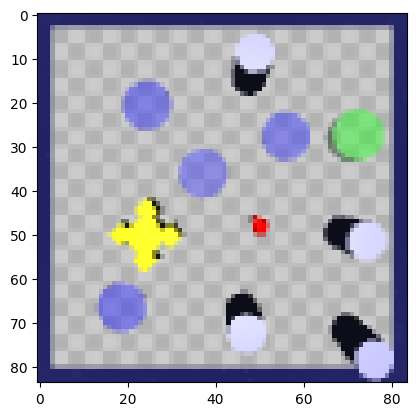

In [1]:
import gym
import safety_gym
import matplotlib.pyplot as plt

env = gym.make('Safexp-PointPush2-img-v0')
env.floor_display_mode = True
print(env.placements_extents)

env.reset()
plt.imshow(env.render('rgb_array', camera_id=0, width=84, height=84))

In [ ]:
ContCost/Safexp-PointPush2-img-v0
IndCost/Safexp-PointPush2-img-v0
CostTerm/Safexp-PointPush2-img-v0

In [3]:
env.cost()

{'cost_pillars': 0.0, 'cost_hazards': 0.0, 'cost': 0.0}

In [1]:
import gym
import safety_gym

env = gym.make('Safexp-PointButton1-img-v0')
#env.observe_vision = True
env.reset()
env.placements_margin

0.0

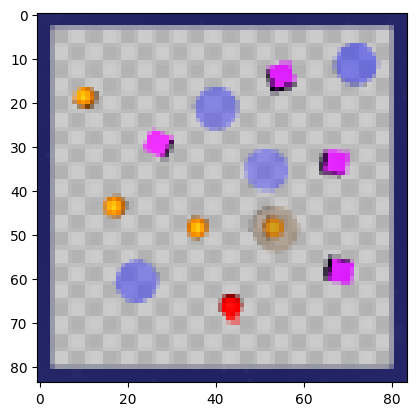

In [2]:
import matplotlib.pyplot as plt
plt.imshow(env.obs()['image'])

In [10]:
env.observation_space, env.obs_space_dict, env.model.camera_names

(Box(21168,),
 OrderedDict([('image', Box(84, 84, 3))]),
 ('fixedtopdown', 'fixednear', 'fixedfar', 'vision', 'track'))

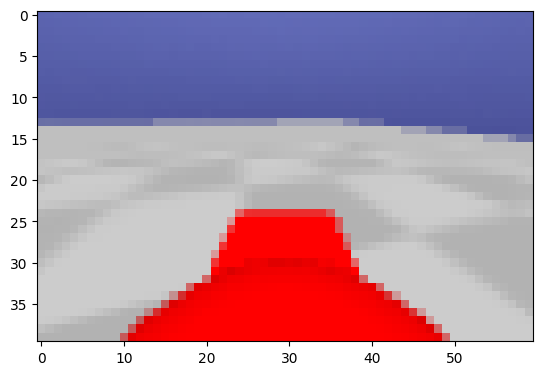

In [2]:
import matplotlib.pyplot as plt
plt.imshow(env.obs_vision()[::-1])

In [1]:
import time
import numpy as np
import gym
import safety_gym

def create_keyboard_listener():
    # List of used keys by MuJoCo viewer
    #    https://github.com/openai/mujoco-py/blob/master/mujoco_py/mjviewer.py#L300
    from pynput import keyboard
    def on_press(key):
        #print(f'{key} pressed {key.char}')
        try:
            if key.char == '/':
                action[0] = 1.0
            if key.char == '8':
                action[0] = -1.0
            if key.char == '9':
                action[1] = 1.0
            if key.char == '7':
                action[1] = -1.0
        except AttributeError:
            #print(f'special key {key} pressed')
            pass

    def on_release(key):
        if key == keyboard.Key.esc:
            print(f'Stopped listener')
            return False
        try:
            if key.char == '/' or key.char == '8':
                action[0] = 0.0
            if key.char == '9' or key.char == '7':
                action[1] = 0.0
        except AttributeError:
            pass

    # Collect events until releaseds
    listener = keyboard.Listener(on_press=on_press, on_release=on_release)
    listener.start()
    #print('Test', listener)
    return listener

listener = create_keyboard_listener()

env = gym.make('ContCost/Safexp-PointButton2-img-v0')
env.floor_display_mode = True
env.num_steps = 1e10
env.reset()
print(f'Action space: {env.action_space}')

action = np.zeros(2)
while True:
    try:
        env.step(action)
        env.render(mode='human')#, render_cost_indicator=False)
    except KeyboardInterrupt as e:
        print('Stopped simulation')
        listener.stop()
        break

Action space: Box(2,)
Creating window glfw
Stopped simulation


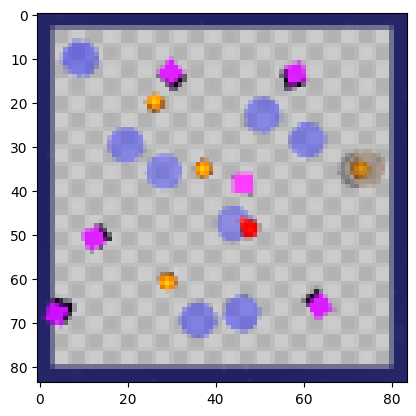

In [3]:
import matplotlib.pyplot as plt
plt.imshow(env.obs()['image'])

## Saving env.sim state

In [2]:
import gym
import safety_gym

env = gym.make('Safexp-PointButton1-v0')
env.floor_display_mode = True

You just do:
`saved_state = env.sim.get_state()`
Then to restore:
`env.sim.set_state(saved_state)`

In [15]:
state = env.sim.get_state()
state.qpos.shape, state.qvel.shape, state.flatten().shape

((31,), (27,), (59,))

In [ ]:
import gym
import safety_gym

env = gym.make('Safexp-PointButton1-v0')
env.floor_display_mode = True

print(f'Action space: {env.action_space}')
env.reset()
while True:        
    env.render(mode='human')
    #print(env.viewer)

Action space: Box(2,)
Creating window glfw
